### 데이터 불러오기


In [97]:
# 출력 제한 해제

import pandas as pd

# 출력 행(row) 수 제한 해제
pd.set_option('display.max_rows', None)

# 출력 열(column) 수 제한 해제 (필요시)
pd.set_option('display.max_columns', None)


In [5]:
import pandas as pd

train = pd.read_csv('./open/train.csv')
test = pd.read_csv('./open/test.csv')


### 데이터 구성 확인

In [6]:
train.head()

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원)
0,TRAIN_0000,P사,TayGTS,Nearly New,86.077,AWD,13642,0,No,2,159.66
1,TRAIN_0001,K사,Niro,Nearly New,56.000,FWD,10199,6,No,0,28.01
2,TRAIN_0002,A사,eT,Brand New,91.200,AWD,2361,7,No,0,66.27
3,TRAIN_0003,A사,RSeTGT,Nearly New,NaN,AWD,21683,3,No,0,99.16
4,TRAIN_0004,B사,i5,Pre-Owned,61.018,AWD,178205,1,No,0,62.02


In [7]:
test.head()

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년)
0,TEST_000,P사,TayCT,Nearly New,76.093,AWD,14057,2,No,0
1,TEST_001,B사,iX,Brand New,90.000,AWD,7547,8,No,0
2,TEST_002,B사,i5,Brand New,NaN,RWD,7197,7,Yes,0
3,TEST_003,H사,ION5,Nearly New,68.479,AWD,10357,7,No,1
4,TEST_004,K사,EV6,Brand New,NaN,FWD,7597,10,No,0


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7497 entries, 0 to 7496
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        7497 non-null   object 
 1   제조사       7497 non-null   object 
 2   모델        7497 non-null   object 
 3   차량상태      7497 non-null   object 
 4   배터리용량     4786 non-null   float64
 5   구동방식      7497 non-null   object 
 6   주행거리(km)  7497 non-null   int64  
 7   보증기간(년)   7497 non-null   int64  
 8   사고이력      7497 non-null   object 
 9   연식(년)     7497 non-null   int64  
 10  가격(백만원)   7497 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 644.4+ KB


In [15]:
# 통계치 확인
train.describe()

,배터리용량,주행거리(km),보증기간(년),연식(년),가격(백만원)
count,4786.000000,7497.000000,7497.000000,7497.000000,7497.000000
mean,69.397187,44287.979458,4.960918,0.222489,62.331949
std,15.283635,55204.064386,3.155342,0.569232,36.646759
min,46.000000,3.000000,0.000000,0.000000,9.000000
25%,56.359000,5465.000000,2.000000,0.000000,34.390000
50%,68.125000,17331.000000,5.000000,0.000000,56.000000
75%,78.227000,61252.000000,8.000000,0.000000,80.050000
max,99.800000,199827.000000,10.000000,2.000000,161.090000


In [17]:
# 결측치 확인
train.isnull().sum()

ID             0
제조사            0
모델             0
차량상태           0
배터리용량       2711
구동방식           0
주행거리(km)       0
보증기간(년)        0
사고이력           0
연식(년)          0
가격(백만원)        0
dtype: int64

In [18]:
train['차량상태'].value_counts()

차량상태
Brand New     3380
Nearly New    2059
Pre-Owned     2058
Name: count, dtype: int64

#### 데이터 분포 확인
- 범주형 컬럼

- 제조사
- 모델
- 차량상태
- 구동방식
- 사고이력

In [22]:
categorical_col = ['제조사', '모델', '차량상태', '구동방식', '사고이력']

In [25]:
# 데이터 분포 확인

value_counts_list = [train[c].value_counts(normalize=True) for c in categorical_col]

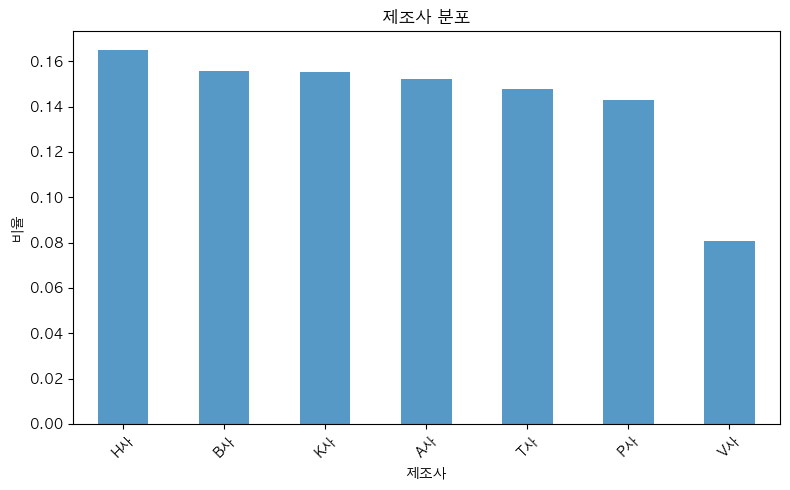

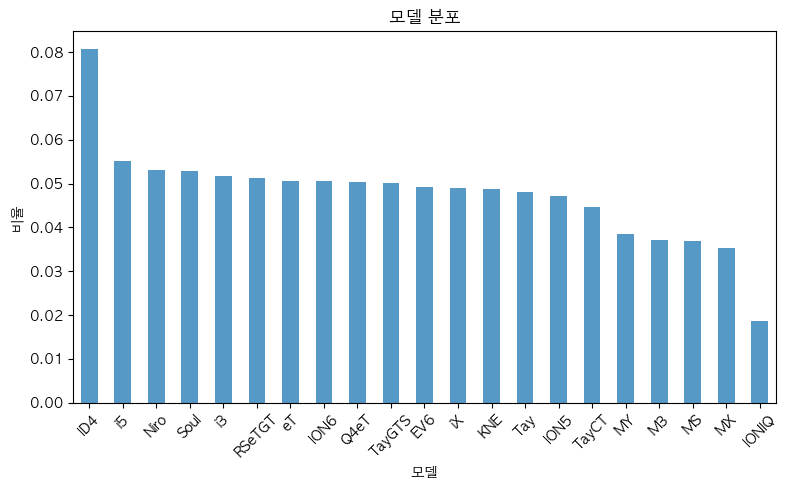

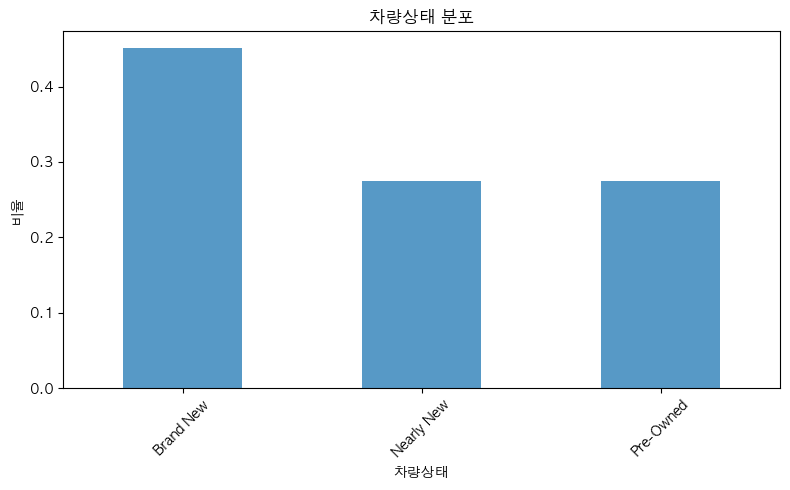

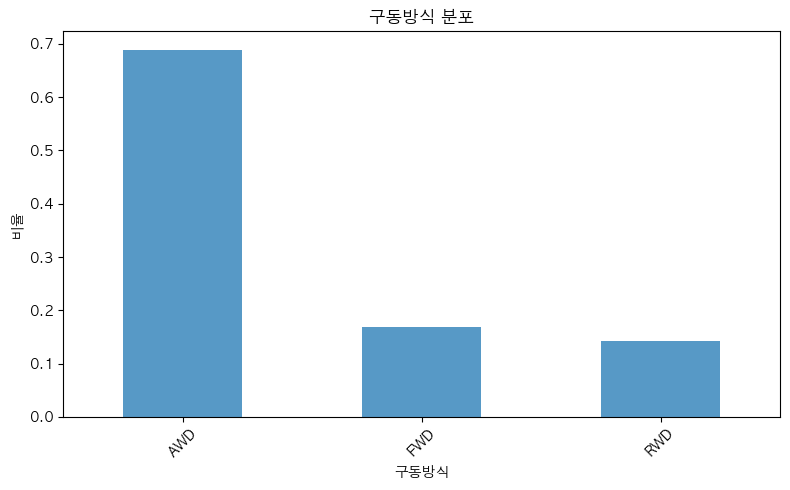

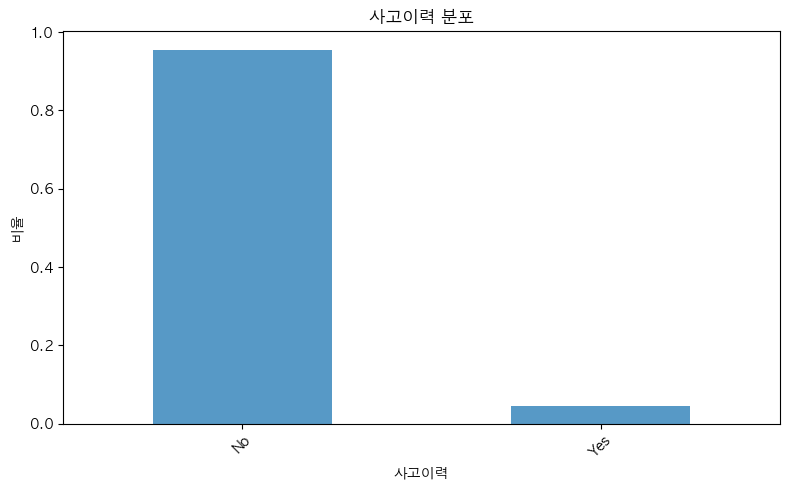

In [29]:
import matplotlib.pyplot as plt
from matplotlib import rc

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'  # macOS 기본 한글 폰트
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 데이터 분포 시각화
for c, value_counts in zip(categorical_col, value_counts_list):
    value_counts.plot(kind='bar', figsize=(8, 5), alpha=0.75, title=f'{c} 분포')
    plt.xlabel(c)
    plt.ylabel('비율')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### 데이터 결측치 처리

In [31]:
train.isnull().sum()

ID             0
제조사            0
모델             0
차량상태           0
배터리용량       2711
구동방식           0
주행거리(km)       0
보증기간(년)        0
사고이력           0
연식(년)          0
가격(백만원)        0
dtype: int64

In [59]:
li = set(train[train['배터리용량'].notnull()]['모델'].values)

In [60]:
li

{'EV6',
 'ID4',
 'ION5',
 'ION6',
 'IONIQ',
 'KNE',
 'M3',
 'MS',
 'MX',
 'MY',
 'Niro',
 'Q4eT',
 'RSeTGT',
 'Soul',
 'Tay',
 'TayCT',
 'TayGTS',
 'eT',
 'i3',
 'i5',
 'iX'}

In [70]:
# '모델'이 'EV6'이고 결측치가 없는 행만 필터링
filtered_data = train[(train['모델'] == 'EV6') & train['배터리용량'].notnull()]

In [75]:
for i in li:
    print(i)
    print(train[(train['모델'] == i) & train['배터리용량'].notnull()]['배터리용량'].mean())
    print(train[(train['모델'] == i) & train['배터리용량'].notnull()]['배터리용량'].median())
    print('------------------------------------')

i3
52.691131498470945
56.0
------------------------------------
iX
90.0
90.0
------------------------------------
EV6
90.0
90.0
------------------------------------
Niro
54.578933333333325
56.0
------------------------------------
RSeTGT
84.39925242718449
90.0
------------------------------------
MY
63.91637988826815
61.153
------------------------------------
Q4eT
69.0407149122807
66.861
------------------------------------
Soul
53.71446036585366
56.0
------------------------------------
ION6
65.87692340425532
63.11
------------------------------------
KNE
72.11759670781893
68.488
------------------------------------
i5
65.49336119402984
63.56
------------------------------------
MX
90.03115121951218
96.0
------------------------------------
M3
64.48288165680474
61.153
------------------------------------
ION5
66.43954545454545
63.11
------------------------------------
TayCT
77.56393269230769
76.093
------------------------------------
ID4
65.42444
62.784
----------------------------

In [89]:
# i3 같은 모델 경우 주행 거리 10만이 넘을 경우 배터리용량이 46 인 것을 확인
train[(train['모델'] == 'i3') & (train['배터리용량'].notnull())]

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원)
63,TRAIN_0063,B사,i3,Nearly New,56.0,RWD,21665,6,No,2,23.89
98,TRAIN_0098,B사,i3,Nearly New,56.0,AWD,14280,5,No,1,23.87
139,TRAIN_0139,B사,i3,Pre-Owned,46.0,RWD,175388,0,No,0,22.23
145,TRAIN_0145,B사,i3,Nearly New,56.0,RWD,25713,3,No,0,23.29
164,TRAIN_0164,B사,i3,Nearly New,56.0,AWD,14652,6,No,2,24.00
...,...,...,...,...,...,...,...,...,...,...,...
7335,TRAIN_7335,B사,i3,Pre-Owned,46.0,RWD,153658,2,No,0,23.19
7338,TRAIN_7338,B사,i3,Nearly New,56.0,RWD,47380,3,No,0,23.38
7484,TRAIN_7484,B사,i3,Pre-Owned,46.0,RWD,185906,1,No,0,23.48
7493,TRAIN_7493,B사,i3,Pre-Owned,46.0,RWD,135411,2,No,0,23.40


In [ ]:
train[(train['배터리용량'] == 56.0) & (train['모델'] == 'i3')]

In [ ]:
train[(train['배터리용량'] == 46.0) & (train['모델'] == 'i3')]

In [94]:
train[(train['배터리용량'] != 46.0) & (train['모델'] == 'i3') & (train['배터리용량'] != 56.0) & (train['배터리용량'].notnull())]

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원)
730,TRAIN_0730,B사,i3,Brand New,90.0,AWD,3261,7,No,0,25.00
1203,TRAIN_1203,B사,i3,Brand New,90.0,AWD,2562,8,No,0,24.92
2182,TRAIN_2182,B사,i3,Brand New,90.0,RWD,7692,8,No,0,24.83
2913,TRAIN_2913,B사,i3,Brand New,90.0,AWD,5480,7,No,0,24.63
3193,TRAIN_3193,B사,i3,Brand New,90.0,AWD,1113,7,No,0,24.86
3337,TRAIN_3337,B사,i3,Brand New,90.0,AWD,5037,8,No,0,24.48
3652,TRAIN_3652,B사,i3,Brand New,90.0,RWD,1544,7,No,0,25.00
3693,TRAIN_3693,B사,i3,Brand New,90.0,RWD,5510,7,No,0,24.70
3798,TRAIN_3798,B사,i3,Brand New,90.0,RWD,3826,7,No,0,24.84
3946,TRAIN_3946,B사,i3,Brand New,90.0,AWD,574,7,No,0,24.96


- i3 경우 차량 상태에 따라 배터리용량이 다르다는 것을 확인

In [ ]:
train[(train['배터리용량'] == 56.0) & (train['모델'] == 'i3')]
train[(train['배터리용량'] == 46.0) & (train['모델'] == 'i3')]